In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Create a dataset for polynomial regression

In [2]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

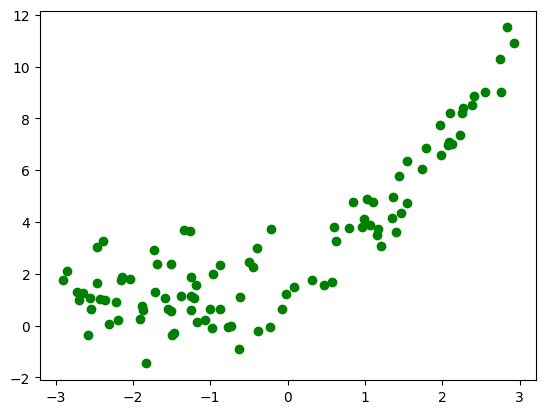

In [3]:
plt.scatter(X, y, color = 'g')

Now we will apply at first linear regression to check the error

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [6]:
regression.fit(X_train, y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression.predict(X_test))

In [8]:
score

0.7214367687546333

### visualize the model

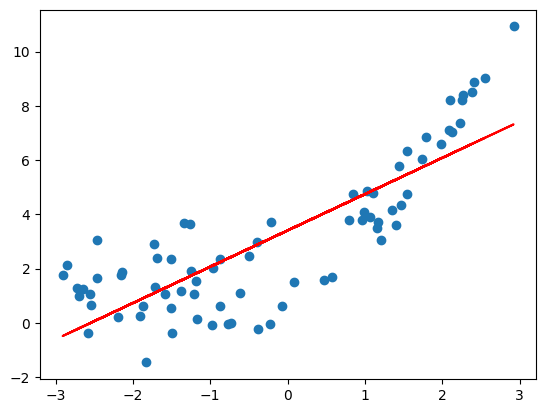

In [9]:
plt.plot(X_train, regression.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)

## Too much Error
now we need to think about polynomial regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00, -1.18989677e+00,  1.41585433e+00],
       [ 1.00000000e+00, -1.26132096e+00,  1.59093057e+00],
       [ 1.00000000e+00, -7.36017120e-02,  5.41721200e-03],
       [ 1.00000000e+00, -2.57637952e+00,  6.63773145e+00],
       [ 1.00000000e+00,  1.10450509e+00,  1.21993149e+00],
       [ 1.00000000e+00,  2.37940399e+00,  5.66156337e+00],
       [ 1.00000000e+00, -3.76831528e-01,  1.42002000e-01],
       [ 1.00000000e+00, -8.69037865e-01,  7.55226811e-01],
       [ 1.00000000e+00, -1.71679342e+00,  2.94737964e+00],
       [ 1.00000000e+00,  2.55446323e+00,  6.52528241e+00],
       [ 1.00000000e+00, -1.24731584e+00,  1.55579681e+00],
       [ 1.00000000e+00, -2.72794709e+00,  7.44169530e+00],
       [ 1.00000000e+00,  7.95314203e-01,  6.32524681e-01],
       [ 1.00000000e+00,  1.73460932e+00,  3.00886950e+00],
       [ 1.00000000e+00, -6.13405999e-01,  3.76266920e-01],
       [ 1.00000000e+00,  8.49906085e-01,  7.22340354e-01],
       [ 1.00000000e+00,  1.46394145e+00

In [12]:
regression1 = LinearRegression()
regression1.fit(X_train_poly, y_train)
y_predict = regression1.predict(X_test_poly)

score = r2_score(y_test, y_predict)
print(score)

0.9335049507864313


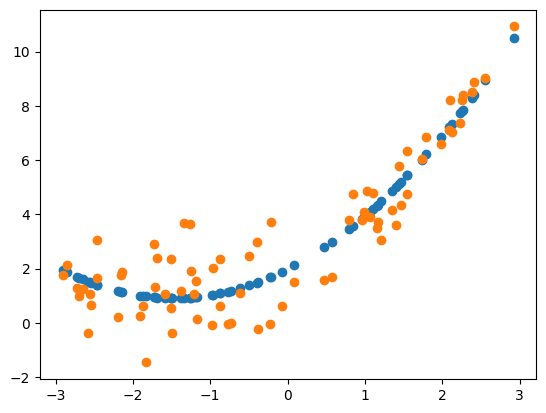

In [13]:
plt.scatter(X_train, regression1.predict(X_train_poly))
plt.scatter(X_train, y_train)

## pipelining Intro

In [14]:
from sklearn.pipeline import Pipeline

In [27]:
def poly_regression(degree):
   X_new = np.linspace(-3, 3, 200).reshape(200, 1)
  
   poly_features = PolynomialFeatures(degree=degree, include_bias=True)
   lin_reg = LinearRegression()
   poly_regression = Pipeline([
     ("poly_features", poly_features),
     ("lin_reg", lin_reg)
   ])
   poly_regression.fit(X_train, y_train)
   y_pred_new = poly_regression.predict(X_new)

   plt.plot(X_new, y_pred_new, 'r', label = "Degree "+ str(degree), linewidth = 2)
   plt.plot(X_train, y_train, "b.", linewidth = 3)
   plt.plot(X_test, y_test, "g.", linewidth = 3)
   plt.legend(loc= "upper left")
   plt.axis([-4,4, 0, 10])
   plt.show()


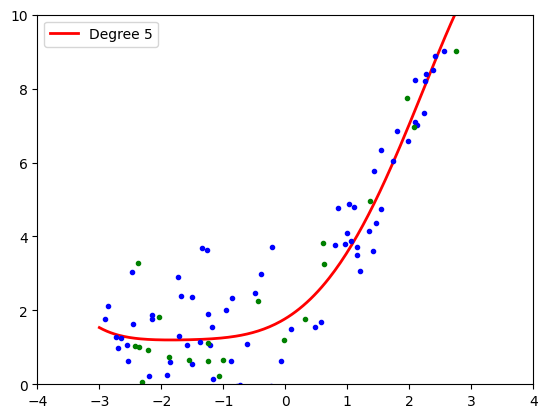

In [28]:
poly_regression(5)